<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
%matplotlib inline


In [2]:
# Load your dataset here

# mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN']
df_nyc_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df_nyc_sales.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df_nyc_sales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00



BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df_nyc_sales.shape


(84548, 22)

### Mengetahui kolom yang terdapat pada data

In [6]:
df_nyc_sales.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

### Mengetahui adanya null values dan tipe data dari setiap kolom

In [7]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

### Mengetahui semua nilai unik dari setiap kolom untuk melihat adanya anomali (unstandard missing values)

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

#### Menghapus kolom-kolom yang tidak diperlukan

In [8]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
unnecessary_columns = ['Unnamed: 0', 'EASE-MENT']
df_nyc_sales.drop(unnecessary_columns,inplace=True, axis=1)


Let's view Dtype of each features in dataframe using `.info()` function.

In [9]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

### Mengetahui semua nilai unik dari setiap kolom untuk melihat adanya anomali (unstandard missing values)
It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [10]:
#First, let's check which columns should be categorical
for col in df_nyc_sales.columns:
    print("UNIQUE VALUES FOR ",col)
    print(df_nyc_sales[col].unique())

UNIQUE VALUES FOR  BOROUGH
[1 2 3 4 5]
UNIQUE VALUES FOR  NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON' 'FORDHAM' 'HIGHBRID

[   0    3    1    2    4   13    5   24    6   19   10   15   14    8
    7   35   42   55   17   38   12   27  422    9   23   52  318   20
   67   11  254   26   49   30   91   59   62   31   73   56   34   32
   18   22   28  147  184   25  172  436   16 2261   51   21  126]
UNIQUE VALUES FOR  TOTAL UNITS
[   5   31   17   10    6   20    8   46   15   24   34    0   47  132
    1    4    2    3    7    9   16  211   32   13   19   35   18   14
   30   12   21   23   45   26   11   48   82   55   42   38   27  422
  538  482  323   52  318   67   25   22   28  107  137   36   37   96
  138   76   33  286  256  771  257   44  315   41   51   40   29   81
   54   72   56   68   74   39   50   61  902   70  551  254  185   78
  181   49   91   87  269  102  234  235  233   59   62   73   43  121
 1653  192  100  113   99   92   75  374   77  238  317   93   69   60
   64  111  395  155  193  103  146  287   94   84   65   95   63   71
   57  736  680  179   53  291   66  114   79   83

In [11]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df_nyc_sales[col] = pd.to_numeric(df_nyc_sales[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df_nyc_sales[col] = df_nyc_sales[col].astype('category')

df_nyc_sales['SALE DATE'] = pd.to_datetime(df_nyc_sales['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [12]:
missing = df_nyc_sales.isnull().sum()/len(df_nyc_sales)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_nyc_sales.isnull().sum()[df_nyc_sales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

There are 1372 rows that can be filled in with their approximate values.

In [13]:
print(df_nyc_sales[(df_nyc_sales['LAND SQUARE FEET'].isnull()) & (df_nyc_sales['GROSS SQUARE FEET'].notnull())].shape)
print(df_nyc_sales[(df_nyc_sales['LAND SQUARE FEET'].notnull()) & (df_nyc_sales['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


In [14]:
df_nyc_sales['LAND SQUARE FEET'] = df_nyc_sales['LAND SQUARE FEET'].mask((df_nyc_sales['LAND SQUARE FEET'].isnull()) & (df_nyc_sales['GROSS SQUARE FEET'].notnull()),df_nyc_sales['GROSS SQUARE FEET'])
df_nyc_sales['GROSS SQUARE FEET'] = df_nyc_sales['GROSS SQUARE FEET'].mask((df_nyc_sales['LAND SQUARE FEET'].notnull()) & (df_nyc_sales['GROSS SQUARE FEET'].isnull()), df_nyc_sales['LAND SQUARE FEET'])

Our dataset is ready for checking missing values.

In [15]:
# check tipe data semua kolom setelah diubah
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [16]:
missing = df_nyc_sales.isnull().sum()/len(df_nyc_sales)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_nyc_sales.isnull().sum()[df_nyc_sales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.042721          31.042721     17.22217
how many missing      26246.000000       26246.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [17]:
print(df_nyc_sales[(df_nyc_sales['LAND SQUARE FEET'].isnull()) & (df_nyc_sales['GROSS SQUARE FEET'].notnull())].shape)
print(df_nyc_sales[(df_nyc_sales['LAND SQUARE FEET'].notnull()) & (df_nyc_sales['GROSS SQUARE FEET'].isnull())].shape)

(0, 20)
(0, 20)


There are 1372 rows that can be filled in with their approximate values.

In [18]:
df_nyc_sales['LAND SQUARE FEET'] = df_nyc_sales['LAND SQUARE FEET'].mask((df_nyc_sales['LAND SQUARE FEET'].isnull()) & (df_nyc_sales['GROSS SQUARE FEET'].notnull()), df_nyc_sales['GROSS SQUARE FEET'])
df_nyc_sales['GROSS SQUARE FEET'] = df_nyc_sales['GROSS SQUARE FEET'].mask((df_nyc_sales['LAND SQUARE FEET'].notnull()) & (df_nyc_sales['GROSS SQUARE FEET'].isnull()), df_nyc_sales['LAND SQUARE FEET'])

In [19]:
# Replacing 0 in YEAR BUILT, ZIP CODE, TOTAL UNIT with np.nan
df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['ZIP CODE']=df_nyc_sales['ZIP CODE'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26246
GROSS SQUARE FEET                 26246
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [20]:
#  Check for duplicates before

print(sum(df_nyc_sales.duplicated()))

df_nyc_sales[df_nyc_sales.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312.0,2,0,2.0,8000.0,4208.0,1985.0,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312.0,2,0,2.0,8000.0,4208.0,1985.0,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,NaN,0,0,NaN,6667.0,6667.0,NaN,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,NaN,0,0,NaN,6667.0,6667.0,NaN,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312.0,1,0,1.0,500.0,1354.0,1996.0,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312.0,1,0,1.0,500.0,1354.0,1996.0,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305.0,2,0,2.0,5000.0,2733.0,1925.0,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305.0,2,0,2.0,5000.0,2733.0,1925.0,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105.0,3,0,3.0,2000.0,1400.0,1930.0,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105.0,3,0,3.0,2000.0,1400.0,1930.0,1,C0,NaN,2017-01-12


In [21]:
#  Check for duplicates before

print(sum(df_nyc_sales.duplicated()))

df_nyc_sales[df_nyc_sales.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312.0,2,0,2.0,8000.0,4208.0,1985.0,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312.0,2,0,2.0,8000.0,4208.0,1985.0,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,NaN,0,0,NaN,6667.0,6667.0,NaN,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,NaN,0,0,NaN,6667.0,6667.0,NaN,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312.0,1,0,1.0,500.0,1354.0,1996.0,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312.0,1,0,1.0,500.0,1354.0,1996.0,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305.0,2,0,2.0,5000.0,2733.0,1925.0,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305.0,2,0,2.0,5000.0,2733.0,1925.0,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105.0,3,0,3.0,2000.0,1400.0,1930.0,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105.0,3,0,3.0,2000.0,1400.0,1930.0,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [22]:
df_nyc_sales.drop_duplicates(inplace=True)

print(sum(df_nyc_sales.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [23]:
df_nyc_sales[df_nyc_sales['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,77814.000000,78777.000000,78777.0,59100.000000,5.278000e+04,5.278000e+04,71918.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10855.438070,1.691737,0.0,2.298173,3.140140e+03,2.714612e+03,1950.930129,9.952969e+05
std,1.298594,3589.241940,671.604654,565.150209,9.838994,0.0,11.296623,2.929999e+04,2.791294e+04,34.460467,3.329268e+06
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.0,1.000000,0.000000e+00,0.000000e+00,1111.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10305.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1925.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11210.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1949.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11358.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1972.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 889. units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [24]:
df_nyc_sales[df_nyc_sales['RESIDENTIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,23614.000000,24546.0,24546.000000,4869.000000,9.503000e+03,9.503000e+03,21087.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10728.885322,0.0,0.459382,2.840008,7.416797e+03,8.870466e+03,1950.370181,1.632257e+06
std,1.334486,3091.222257,570.045258,607.554524,0.0,15.826020,35.445493,8.032892e+04,7.890877e+04,27.345368,1.969307e+07
min,1.000000,1.000000,1.000000,10001.000000,0.0,0.000000,1.000000,0.000000e+00,0.000000e+00,1111.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10025.000000,0.0,0.000000,1.000000,0.000000e+00,0.000000e+00,1930.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11103.000000,0.0,0.000000,1.000000,0.000000e+00,0.000000e+00,1952.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,1.000000,3.250000e+03,2.500000e+03,1963.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


Write your findings below:

## Total BOROUGH

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [25]:
# Write your syntax below
df_nyc_sales['BOROUGH'].value_counts()


4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

## Mengecek jumlah missing values pada setiap kolom

In [26]:
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                            971
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19677
LAND SQUARE FEET                  26049
GROSS SQUARE FEET                 26049
YEAR BUILT                         6885
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

## Mengganti nilai missing values untuk kolom numerik (kecuali SALE PRICE) dengan nilai rata-rata

In [27]:
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df_nyc_sales[float_col].fillna(df_nyc_sales[float_col].mean(),inplace=True)

In [28]:
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                            971
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19677
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                         6885
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

### Menghapus sisa kolom yang masih memuat missing values
------------------------------------------------------------
Kolom SALE PRICE dan TOTAL UNIT yang memiliki nilai nan tidak bisa diartikan.

In [29]:
df_nyc_sales.dropna(inplace=True)
df_nyc_sales.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [30]:
df_nyc_sales.index = range(0,len(df_nyc_sales))
df_nyc_sales.shape

(48768, 20)

## Modifikasi kolom 'SALE DATE'
Ubah kolom 'SALE DATE' menjadi tipe datetime serta tambahkan kolom year, month, date, lalu hapus kolom 'SALE DATE'

In [31]:
df_nyc_sales['SALE DATE'] = pd.to_datetime(df_nyc_sales['SALE DATE'])
df_nyc_sales['SALE YEAR'] = df_nyc_sales['SALE DATE'].dt.year
df_nyc_sales['SALE MONTH'] = df_nyc_sales['SALE DATE'].dt.month_name()
df_nyc_sales['SALE DATE dt'] = df_nyc_sales['SALE DATE'].dt.day
df_nyc_sales['SALE DAY'] = df_nyc_sales['SALE DATE'].dt.day_name()
df_nyc_sales.drop('SALE DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
df_nyc_sales.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

## Mean

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [32]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)

print('Mean GROSS SQUARE FEET for each',df_nyc_sales.groupby(['BOROUGH'])['GROSS SQUARE FEET'].mean())

# Graded-Funtion End

Mean GROSS SQUARE FEET for each BOROUGH
1    9271.615198
2    5931.211186
3    3106.398973
4    3116.335120
5    2492.090290
Name: GROSS SQUARE FEET, dtype: float64


## Median

From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [33]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
print('Median GROSS SQUARE FEET for each',df_nyc_sales.groupby(['BOROUGH'])['GROSS SQUARE FEET'].median())

# Graded-Funtion End

Median GROSS SQUARE FEET for each BOROUGH
1    4206.653514
2    2165.000000
3    1998.000000
4    1790.000000
5    1656.000000
Name: GROSS SQUARE FEET, dtype: float64


## Mode

From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [34]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)

print('Mode GROSS SQUARE FEET for each',df_nyc_sales.groupby(['BOROUGH'])['GROSS SQUARE FEET'].agg(pd.Series.mode))

# Graded-Funtion End

Mode GROSS SQUARE FEET for each BOROUGH
1    4206.653514
2       0.000000
3       0.000000
4    4206.653514
5    4206.653514
Name: GROSS SQUARE FEET, dtype: float64


## Range masing-masing 'Borough'

From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [35]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df_nyc_sales_range = df_nyc_sales.groupby(['BOROUGH'])['GROSS SQUARE FEET'].agg(pd.Series.max)-df_nyc_sales.groupby(['BOROUGH'])['GROSS SQUARE FEET'].agg(pd.Series.min)

# Graded-Funtion End
print('Range GROSS SQUARE FEET for each',df_nyc_sales_range)


Range GROSS SQUARE FEET for each BOROUGH
1    1616884.0
2    1303935.0
3    1330743.0
4    3750365.0
5     682960.0
Name: GROSS SQUARE FEET, dtype: float64


## Varian masin-masing 'Borough"

From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [36]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
print('Variance GROSS SQUARE FEET for each',df_nyc_sales.groupby(['BOROUGH'])['GROSS SQUARE FEET'].agg(pd.Series.var))
# Graded-Funtion End

Variance GROSS SQUARE FEET for each BOROUGH
1    2.124112e+09
2    1.118646e+09
3    2.755609e+08
4    1.179849e+09
5    1.988338e+08
Name: GROSS SQUARE FEET, dtype: float64


## Standar Deviasi masing-masing 'Borough'

From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [37]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
print('Standard Deviation GROSS SQUARE FEET for each',df_nyc_sales.groupby(['BOROUGH'])['GROSS SQUARE FEET'].agg(pd.Series.var)**0.5)
# Graded-Funtion End

Standard Deviation GROSS SQUARE FEET for each BOROUGH
1    46088.090732
2    33446.165694
3    16600.027043
4    34348.933349
5    14100.842913
Name: GROSS SQUARE FEET, dtype: float64


## Analysis Distribusi Probabilitas

Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

### Preparering Dataset

In [51]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
%matplotlib inline

In [52]:
# mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN']
df_nyc_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)


In [53]:
df_nyc_sales.shape

(84548, 22)

In [55]:
for col in df_nyc_sales.columns:
    print("UNIQUE VALUES FOR ",col)
    print(df_nyc_sales[col].unique())

UNIQUE VALUES FOR  Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
UNIQUE VALUES FOR  BOROUGH
[1 2 3 4 5]
UNIQUE VALUES FOR  NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CR

In [56]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_nyc_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

In [57]:
# Replacing 0 in YEAR BUILT, ZIP CODE, TOTAL UNIT with np.nan
df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['ZIP CODE']=df_nyc_sales['ZIP CODE'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})

In [58]:
df_nyc_sales.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [59]:
unnecessary_columns = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df_nyc_sales.drop(unnecessary_columns,inplace=True, axis=1)

In [61]:
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df_nyc_sales[cat_col].fillna(df_nyc_sales[cat_col].mode()[0],inplace=True)

In [62]:
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df_nyc_sales[float_col].fillna(df_nyc_sales[float_col].median(),inplace=True)

In [63]:
df_nyc_sales.dropna(inplace=True)

In [64]:
# check for all duplicates row
df_nyc_sales[
    df_nyc_sales.duplicated()
]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


In [65]:
# print sum for all duplicates
rows_duplicated = df_nyc_sales.duplicated()
print(rows_duplicated.sum())

367


In [66]:
# drop duplicate row
df_nyc_sales.drop_duplicates(subset=df_nyc_sales.columns,keep='first', inplace=True)
# show records after remove duplicates row
df_nyc_sales.shape

(51996, 18)

In [67]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('int64')

In [68]:
df_nyc_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

In [69]:
df_nyc_sales['SALE DATE'] = pd.to_datetime(df_nyc_sales['SALE DATE'])
df_nyc_sales['SALE YEAR'] = df_nyc_sales['SALE DATE'].dt.year
df_nyc_sales['SALE MONTH'] = df_nyc_sales['SALE DATE'].dt.month_name()
df_nyc_sales['SALE DATE dt'] = df_nyc_sales['SALE DATE'].dt.day
df_nyc_sales['SALE DAY'] = df_nyc_sales['SALE DATE'].dt.day_name()
df_nyc_sales.drop('SALE DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
df_nyc_sales.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)


In [70]:
df_nyc_sales.index = range(0,len(df_nyc_sales))

In [71]:
df_nyc_sales.shape

(51996, 21)

In [72]:
# Hitung kuartile 3 setiap atribut pada data
Q3 = df_nyc_sales.quantile(0.75)

# Hitung kuartile 1 setiap atribut pada data
Q1 = df_nyc_sales.quantile(0.25)

# Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df_nyc_sales[
    ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)
]

# melakukan indexing ulang pada dataframe karena indexnya berantakan setelah dilakukan penghapusan data outliers
df_filtered.index = [i for i in range(len(df_filtered))]
df_nyc_sales = df_filtered

C:\Users\INDRIA~1.HAZ\AppData\Local\Temp/ipykernel_18516/569850398.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)


## Uji Distribusi  Normal
--------------------------------------------------
Melihat atribut 'GROSS SQUARE FEET' apakah berdistribusi Normal


### Melihat distribusi dari atribut 'GROSS SQUARE FEET'

Text(0, 0.5, 'Frekuensi')

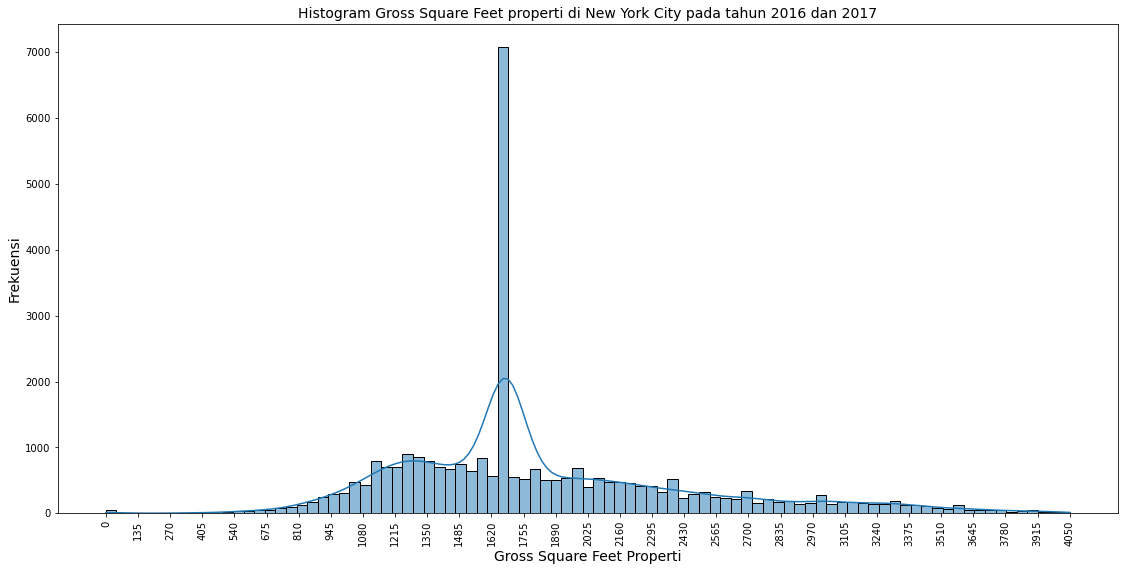

In [73]:
df_gross_square_feet = df_nyc_sales['GROSS SQUARE FEET']
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_gross_square_feet = np.histogram(df_gross_square_feet,bins=30)
sns.histplot(df_gross_square_feet,kde=True, ax=ax)
ax.set_title('Histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017', fontsize=14)
ax.set_xlabel('Gross Square Feet Properti', fontsize=14)
ax.set_xticks(bin_edge_gross_square_feet)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=14)

Dari grafik diatas dapak kita ambil kesimpuln bahwa atribut 'GROSS SQUARE FEET' belum berdistribusi normal

### Melakukan Central Limit Theorem agar membuat distribusi menjadi normal
------------------------------------------------------------------
Mengambil sejumlah 1500 sample mean dari sejumlah 200 nilai acak.


In [74]:
n = 200
m = 1500
sample_mean_gross_square_feet = []
for i in range(m):
    sample_values = np.random.choice(a=df_gross_square_feet,size=n)
    sample_mean_gross_square_feet.append(np.mean(sample_values))

Text(0, 0.5, 'Frekuensi')

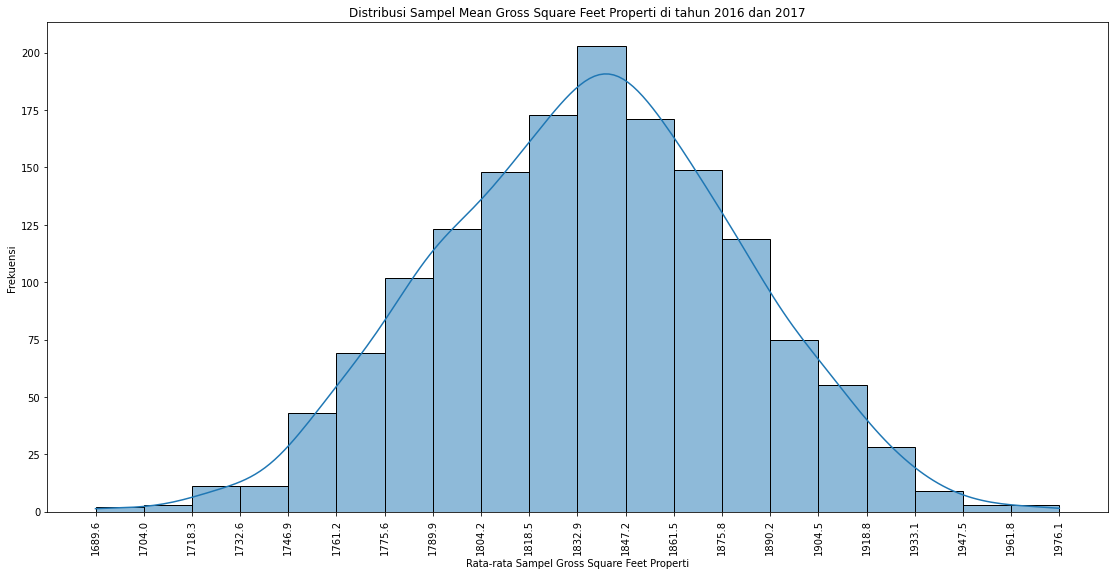

In [75]:
count, bin_edges = np.histogram(sample_mean_gross_square_feet, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_gross_square_feet,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean Gross Square Feet Properti di tahun 2016 dan 2017')
ax.set_xlabel('Rata-rata Sampel Gross Square Feet Properti')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

#### ANALISIS
Distribusi dari sampel mean sudah normal

# Confidence Intervals 

-----------------------------------------
Confidence Intervals pada kasus ini akan digunakan untuk mengestimasi rata-rata harga jual properti di New York dari tahun 2016 - 2017
Function below are graded function. (1 Points)

In [77]:
pop_mean_sale_price = df_nyc_sales['SALE PRICE'].mean()
print('Rata-rata Sale Price =',pop_mean_sale_price)

pop_std_sale_price = df_nyc_sales['SALE PRICE'].std()
print('Standar Deviasi Populasi Sale Price =',pop_std_sale_price)



Rata-rata Sale Price = 573835.3769552765
Standar Deviasi Populasi Sale Price = 448406.1861522448


### Lihat distribusi (histogram) dari property sales

Text(0, 0.5, 'Frekuensi')

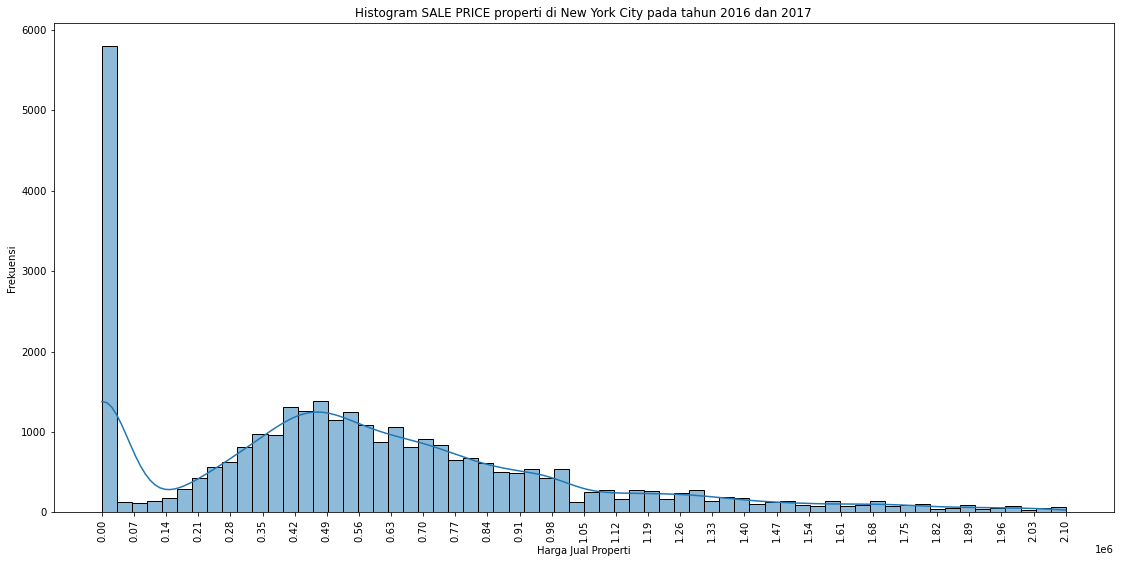

In [78]:
# Plotting for SALE PRICE
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edges_sale_price = np.histogram(df_nyc_sales['SALE PRICE'],bins=30)
sns.histplot(df_nyc_sales['SALE PRICE'],kde=True, ax=ax)
ax.set_title('Histogram SALE PRICE properti di New York City pada tahun 2016 dan 2017')
ax.set_xlabel('Harga Jual Properti')
ax.set_xticks(bin_edges_sale_price)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

Dari grafik ini terlihat bahwa distribusi belum normal. Karena distribusi data belum normal dan cenderung condong ke kanan (right skewed). Oleh karena itu, perlu dilakukan Central Limit Theorem agar distribusi datanya menjadi normal.


### Membuat data berdistribusi normal dengan central limit theorem
-----------------------------------------------------
Central limit theorem akan melakukan sampling pada data dengan mengambil m sampel dari n nilai acak. Pada kasus ini akan dilakukan sampling dengan jumlah sampel 10000 dari 100 nilai acak. Distribusi dari sampel yang diambil akan berdistribusi normal. Sehingga perhitungan CI bisa dilakukan pada sampel yang sudah berdistribusi normal ini

In [79]:
sample_means = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=df_nyc_sales['SALE PRICE'], size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means.append(sample_mean)

Text(0, 0.5, 'Frekuensi')

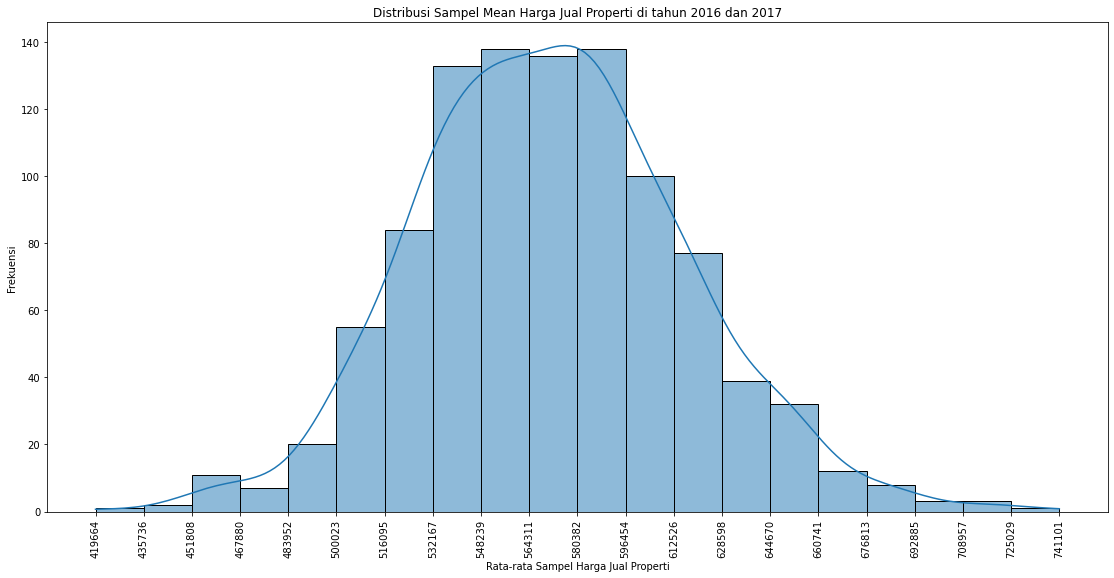

In [80]:
count, bin_edges = np.histogram(sample_means, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_means,kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean Harga Jual Properti di tahun 2016 dan 2017')
ax.set_xlabel('Rata-rata Sampel Harga Jual Properti')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

In [81]:
sample_means_series = pd.Series(sample_means)

# hitung nilai rata-rata
print('Rata rata sampel mean SALE PRICE = ', sample_means_series.mean())
# Hitung nilai median
print('Median sampel mean SALE PRICE = ', sample_means_series.median())
# hitung standard deviasi 
print('Standar Deviasi sampel mean SALE PRICE = ', sample_means_series.std())

Rata rata sampel mean SALE PRICE =  571701.3660300006
Median sampel mean SALE PRICE =  571277.205
Standar Deviasi sampel mean SALE PRICE =  44841.854800586036


In [88]:
mean_of_sampel_mean = np.mean(sample_means)
std_of_sampel_mean = np.std(sample_means)
# tetapkan batas critical z_score 
z_score = 1.96
number_of_observation = len(df_nyc_sales)
standard_error_of_sampel_mean = pop_std_sale_price/np.sqrt(number_of_observation)

lower_bound = mean_of_sampel_mean - z_score*standard_error_of_sampel_mean
upper_bound = mean_of_sampel_mean + z_score*standard_error_of_sampel_mean


print('Mean of sample =',mean_of_sampel_mean)
print('STD of Sample =',std_of_sampel_mean )
print('Batas critical z_score =',z_score)
print('Standar error dari sampel =',standard_error_of_sampel_mean)
print('                                              ')
print('Hitung batas atas dan batas bawah untuk area di mana 95% mean sampel berada dari mean populasi ')
print(lower_bound,'----', upper_bound)


Mean of sample = 571701.3660299999
STD of Sample = 44819.42826514953
Batas critical z_score = 1.96
Standar error dari sampel = 2515.605201555212
                                              
Hitung batas atas dan batas bawah untuk area di mana 95% mean sampel berada dari mean populasi 
566770.7798349517 ---- 576631.9522250481


### Gambar histogram akhir

Text(0.5, 0, 'Sampel Mean New York Property Sales Price')

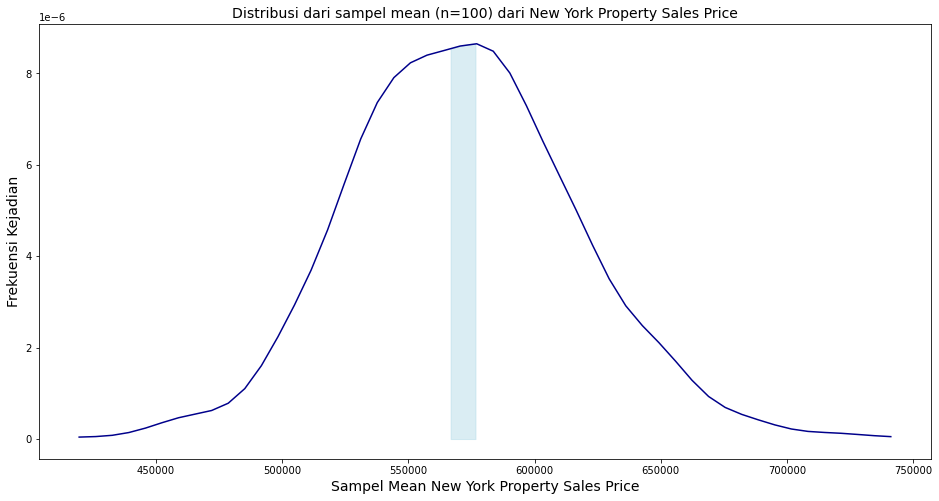

In [89]:
plt.figure(figsize=(16,8))
kde = scistats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means))
plt.plot(pos,kde(pos), color='darkblue')
shade = np.linspace(lower_bound,upper_bound)
plt.fill_between(shade,kde(shade),alpha=0.45,color='lightblue')
plt.title('Distribusi dari sampel mean (n='+str(n)+') dari New York Property Sales Price', fontsize=14)
plt.ylabel('Frekuensi Kejadian', fontsize=14)
plt.xlabel('Sampel Mean New York Property Sales Price',fontsize=14)


#### Kesimpulan
---------------------------------------------------
Area di bawah kurva yang diarsir menunjukkan 95% data sampel mean berada pada area ini. Atau dengan kata lain berada dalam rentang +- 1.96 z score dari nilai rata-ratanya.
Kesimpulan Confidence Intervals : 95% Confidence Interval menyatakan bahwa nilai rata-rata dari harga jual properti di New York City dari tahun 2016 - 2017 berada dalam rentang 569650.8237149519 sampai 579511.9961050482 US Dollar

## Hypothesis Testing below
-------------------------------------------
pakah rata-rata harga jual bangunan di New York City pada tahun 2017 berbeda secara signifikan dari rata-rata harga jual bangunan di New York City pada tahun 2016?

### Deklarasikan Hipotesis Null dan Hipotesis Alternatif
----------------------------------------------------------Populasi: Harga jual bangunan (properti) dalam NYC Sales Data pada tahun 2016 dan 2017
Parameter of Interest: miu1 --> harga jual bangunan di New York City pada tahun 2016, miu2 --> harga jual bangunan di New York City pada tahun 2017
H0 : miu1 = miu2
Ha: miu1 != miu2

### Tentukan level signifikansi
--------------------------------------------------------
Level signifikansi atau alhpa yang digunakan biasanya 0.05.

Jika p value > alpha maka terima H0
Jika p value <= alpha maka tolak H0

### Lihat distribusi dari data
--------------------------------------------------------
Z test dilakukan untuk distribusi data yang normal. Pada tahap ini akan dilihat distribusi dari populasi penjualan bangunan di New York City pada tahun 2016 dan 2017



In [91]:
# mengambil data penjualan (SALE PRICE) untuk tahun 2016
sales_2016 = df_nyc_sales[
    (df_nyc_sales['SALE YEAR']==2016)
]['SALE PRICE']

# mengambil data penjualan (SALE PRICE) untuk tahun 2017
sales_2017 = df_nyc_sales[
    (df_nyc_sales['SALE YEAR']==2017)
]['SALE PRICE']

# menghitung banyak data penjualan (SALE PRICE) pada tahun 2016 dan 2017
len(sales_2016), len(sales_2017)

(11099, 20674)

Text(0, 0.5, 'Frekuensi')

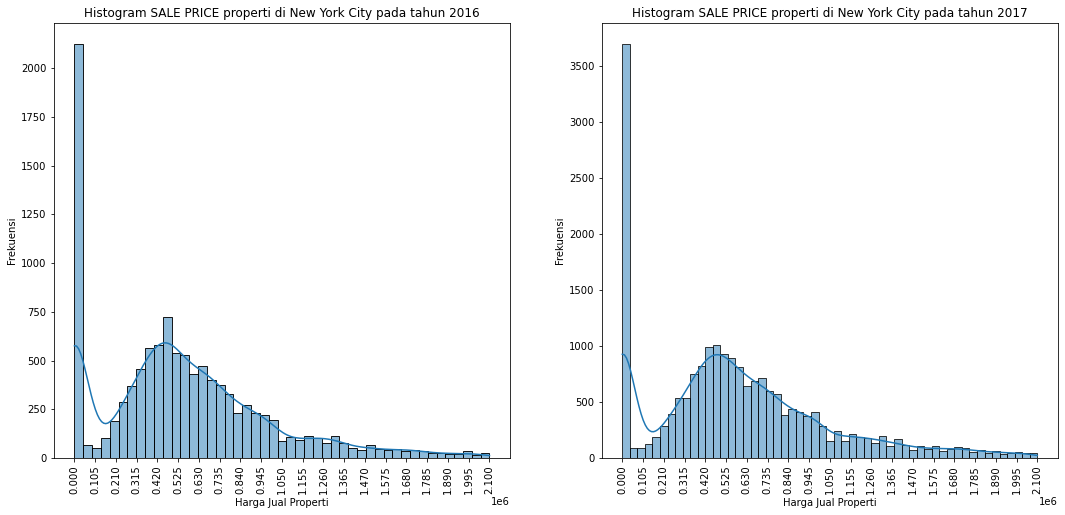

In [92]:
# menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sales_2016,bins=20)
sns.histplot(sales_2016,kde=True, ax=ax)
ax.set_title('Histogram SALE PRICE properti di New York City pada tahun 2016')
ax.set_xlabel('Harga Jual Properti')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sales_2017,bins=20)
sns.histplot(sales_2017, kde=True, ax=ax0)
ax0.set_title('Histogram SALE PRICE properti di New York City pada tahun 2017')
ax0.set_xlabel('Harga Jual Properti')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

karena jumlah penjualan bangunan pada tahun 2017 tidak seimbang dengan tahun 2016. Selain itu, grafik distribusi histogram juga menunjukkan bahwa data belum berdistribusi normal. Oleh sebab itu, akan dilakukan sampling sesuai dengan central limit theorem. Sampling akan dilakukan sebanyak 1000 sampel yang diambil dari 100 nilai acak pada masing-masing tahun. Setelah data berdistribusi normal, akan dilakukan z test untuk menguji hipotesis yang sudah dibuat


### Implementasi Central Limit Theorem

In [93]:
sample_means_2016 = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=sales_2016, size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means_2016.append(sample_mean)

sample_means_2017 = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=sales_2017, size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means_2017.append(sample_mean)

Text(0, 0.5, 'Frekuensi')

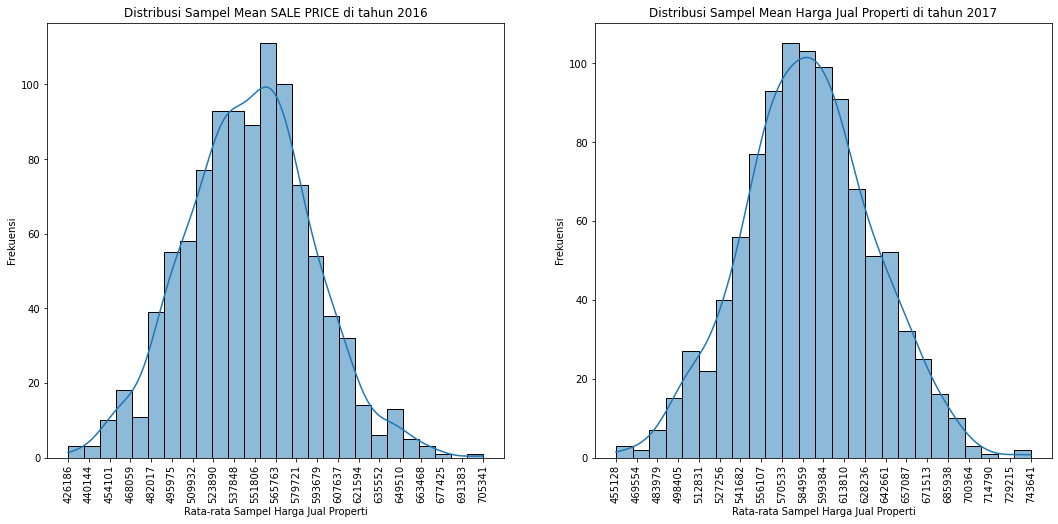

In [94]:
# menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sample_means_2016,bins=20)
sns.histplot(sample_means_2016, kde=True, ax=ax)
ax.set_title('Distribusi Sampel Mean SALE PRICE di tahun 2016')
ax.set_xlabel('Rata-rata Sampel Harga Jual Properti')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sample_means_2017,bins=20)
sns.histplot(sample_means_2017, kde=True, ax=ax0)
ax0.set_title('Distribusi Sampel Mean Harga Jual Properti di tahun 2017')
ax0.set_xlabel('Rata-rata Sampel Harga Jual Properti')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

### Menghitung test statistics

In [96]:
import statsmodels.api as sm
z_score, pvalue = sm.stats.ztest(sample_means_2016,sample_means_2017,alternative='two-sided')

Nilai P-Value = 6.546137761031368e-96
Ha diterima : Rata-rata Harga jual bangunan di New York City pada tahun 2016 tidak sama dengan tahun 2017


### Penarikan Kesimpulan

In [97]:
print('Nilai P-Value =',pvalue)
print('                     ')
print('KESIMPULAN')
if pvalue > 0.05:
    print("H0 diterima : Rata-rata Harga jual bangunan di New York City pada tahun 2016 sama dengan tahun 2017")
else:
    print("Ha diterima : Rata-rata Harga jual bangunan di New York City pada tahun 2016 tidak sama dengan tahun 2017")


Nilai P-Value = 6.546137761031368e-96
                     
KESIMPULAN
Ha diterima : Rata-rata Harga jual bangunan di New York City pada tahun 2016 tidak sama dengan tahun 2017


### ANALISIS

Karena nilai p-value 6.546137761031368e-96 sangat kecil dan nilainya kurang dari atau sama dengan alpha (0.05), maka H0 yang menyatakan bahwa rata-rata harga jual properti di New York City pada tahun 2016 sama dengan rata-rata harga jual properti di New York City pada tahun 2017.

Oleh karena itu, Ha diterima, yaitu terdapat perbedaan yang signifikan antara rata-rata harga jual properti di New York City pada tahun 2016 dan 2017